In [1]:
import numpy as np 
import matplotlib.pyplot as plt
%matplotlib inline 
import math

In [2]:
x=np.linspace(0,20)
y= -1 * x + 2

In [3]:
print(x)

[ 0.          0.40816327  0.81632653  1.2244898   1.63265306  2.04081633
  2.44897959  2.85714286  3.26530612  3.67346939  4.08163265  4.48979592
  4.89795918  5.30612245  5.71428571  6.12244898  6.53061224  6.93877551
  7.34693878  7.75510204  8.16326531  8.57142857  8.97959184  9.3877551
  9.79591837 10.20408163 10.6122449  11.02040816 11.42857143 11.83673469
 12.24489796 12.65306122 13.06122449 13.46938776 13.87755102 14.28571429
 14.69387755 15.10204082 15.51020408 15.91836735 16.32653061 16.73469388
 17.14285714 17.55102041 17.95918367 18.36734694 18.7755102  19.18367347
 19.59183673 20.        ]


In [4]:
print(y)

[  2.           1.59183673   1.18367347   0.7755102    0.36734694
  -0.04081633  -0.44897959  -0.85714286  -1.26530612  -1.67346939
  -2.08163265  -2.48979592  -2.89795918  -3.30612245  -3.71428571
  -4.12244898  -4.53061224  -4.93877551  -5.34693878  -5.75510204
  -6.16326531  -6.57142857  -6.97959184  -7.3877551   -7.79591837
  -8.20408163  -8.6122449   -9.02040816  -9.42857143  -9.83673469
 -10.24489796 -10.65306122 -11.06122449 -11.46938776 -11.87755102
 -12.28571429 -12.69387755 -13.10204082 -13.51020408 -13.91836735
 -14.32653061 -14.73469388 -15.14285714 -15.55102041 -15.95918367
 -16.36734694 -16.7755102  -17.18367347 -17.59183673 -18.        ]


In [5]:
# Adagrad
#epsilon

eps=(math.e)**-8
def Predict_y(theta0,theta1):
    return theta0+theta1*x


def CostFunc(predictedY):
    return 0.5 * (1/m) * (np.sum((predictedY- y)**2))

def GradientTheta(predictedY):
    grad_theta0=(1/m) * np.sum(predictedY - y)
    grad_theta1=(1/m) * np.sum((predictedY - y) * x)
    return grad_theta0, grad_theta1


    
def UpdateThetas(L_R,theta0,theta1,predictedY,Vt_theta0,Vt_theta1):
    Grad_Of_Theta0,Grad_Of_Theta1=GradientTheta(predictedY)
    Grad_Vec = np.array([Grad_Of_Theta0,Grad_Of_Theta0])
    
    Vt_theta0= Vt_theta0 +  Grad_Of_Theta0**2
    Vt_theta1= Vt_theta1 +  Grad_Of_Theta1**2
    
    theta_0update=theta0 - L_R* Grad_Of_Theta0/(math.sqrt(Vt_theta0) + eps)
    theta_1update=theta1 - L_R* Grad_Of_Theta1/(math.sqrt(Vt_theta1) + eps)
    return Grad_Vec, theta_0update, theta_1update,Vt_theta0,Vt_theta1




def FindBestThetas(x,y,N,Max_iterations):
    L_R=N
    
    
    theta0=0
    theta1=0
    theta0List=[]
    theta1List=[]
    
    predictedYList=[]
    CostFunList=[]
    iterations=0
    Vt_theta0=0
    Vt_theta1=0
  
    while (iterations < Max_iterations) :
            
            if iterations > 1:
                if np.linalg.norm(grad_vec)< 10**-4:
                    print("Grad condition stopped the iterations")
                    break
                elif abs(CostFunList[iterations-1]- CostFunList[iterations-2])< 10**-4:
                    print("cost condition stoppped the iterations")
                    break
            
        
            theta0List.append(theta0)
            theta1List.append(theta1)
            
            predictedY= Predict_y(theta0,theta1)
            predictedYList.append(predictedY)
            
            Jcost1=CostFunc(predictedY)
            CostFunList.append(Jcost1)
            
            grad_vec, theta0,theta1,Vt_theta0,Vt_theta1= UpdateThetas(L_R,theta0,theta1,predictedY,Vt_theta0,Vt_theta1)
            #print(grad_vec[0])
            
            iterations+=1
            
            
    return theta0List,theta1List,CostFunList,predictedYList,theta0,theta1,iterations
        



In [6]:
#N=Learning_rate=L_R
N=0.05

m=len(y)

Max_iterations=5000

Theta0_List,Theta1_List,Cost_List,predictedY_List,BestTheta0,BestTheta1,iterationsDone= FindBestThetas(x,y,N,Max_iterations)
BestYPredicted= Predict_y(BestTheta0,BestTheta1)

print("BestTheta0:",BestTheta0)
print("BestTheta1:",BestTheta1)

print(iterationsDone)

cost condition stoppped the iterations
BestTheta0: 0.8629583025322987
BestTheta1: -0.913522073491329
2887


In [7]:
from sklearn.metrics import r2_score

r2_score(y,BestYPredicted)

0.9903849713019287

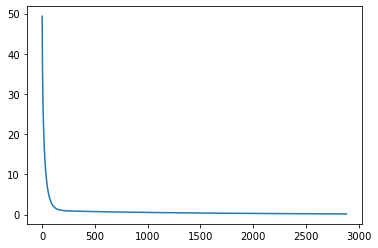

In [8]:
plt.plot(range(0,iterationsDone),Cost_List)

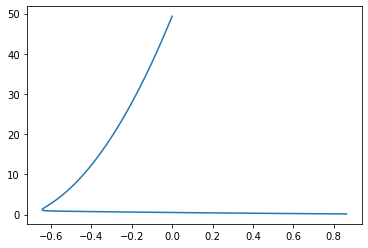

In [9]:
plt.plot(Theta0_List,Cost_List)

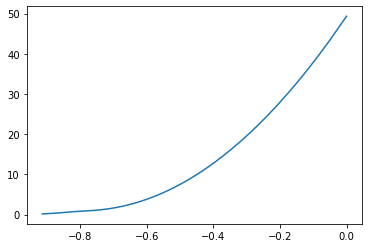

In [10]:
plt.plot(Theta1_List,Cost_List)
plt.show()

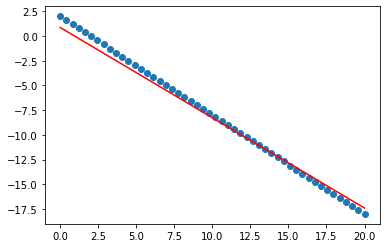

In [11]:
plt.scatter(x,y)
plt.plot(x,BestYPredicted,'r')

In [13]:
#**********************************************RMSprop*********************************************************************
#**************************************************************************************************************************

In [13]:

#epsilon
eps=(math.e)**-8
#beta
B=0.9

def Predict_y(theta0,theta1):
    return theta0+theta1*x


def CostFunc(predictedY):
    return 0.5 * (1/m) * (np.sum((predictedY- y)**2))

def GradientTheta(predictedY):
    grad_theta0=(1/m) * np.sum(predictedY - y)
    grad_theta1=(1/m) * np.sum((predictedY - y) * x)
    return grad_theta0, grad_theta1


    
def UpdateThetas(L_R,theta0,theta1,predictedY,Vt_theta0,Vt_theta1):
    Grad_Of_Theta0,Grad_Of_Theta1=GradientTheta(predictedY)
    Grad_Vec = np.array([Grad_Of_Theta0,Grad_Of_Theta0])
    
    Vt_theta0= B * Vt_theta0 + (1-B) * Grad_Of_Theta0**2
    
    Vt_theta1= B * Vt_theta1 + (1-B) * Grad_Of_Theta1**2
    
    theta_0update=theta0 - L_R* Grad_Of_Theta0/(math.sqrt(Vt_theta0) + eps)
    theta_1update=theta1 - L_R* Grad_Of_Theta1/(math.sqrt(Vt_theta1) + eps)
    return Grad_Vec, theta_0update, theta_1update,Vt_theta0,Vt_theta1



def FindBestThetas(x,y,N,Max_iterations):
    L_R=N
    
    
    theta0=0
    theta1=0
    theta0List=[]
    theta1List=[]
    
    predictedYList=[]
    CostFunList=[]
    iterations=0
    Vt_theta0=0
    Vt_theta1=0
  
    while (iterations < Max_iterations) :
            
            if iterations > 1:
                if np.linalg.norm(grad_vec)< 10**-4:
                    print("Grad condition stopped the iterations")
                    break
                elif abs(CostFunList[iterations-1]- CostFunList[iterations-2])< 10**-4:
                    print("cost condition stoppped the iterations")
                    break
            
        
            theta0List.append(theta0)
            theta1List.append(theta1)
            
            predictedY= Predict_y(theta0,theta1)
            predictedYList.append(predictedY)
            
            Jcost1=CostFunc(predictedY)
            CostFunList.append(Jcost1)
            
            grad_vec, theta0,theta1,Vt_theta0,Vt_theta1= UpdateThetas(L_R,theta0,theta1,predictedY,Vt_theta0,Vt_theta1)
            
            
            iterations+=1
            
            
    return theta0List,theta1List,CostFunList,predictedYList,theta0,theta1,iterations
        



In [14]:
N=0.001
m=len(y)

Max_iterations=5000

Theta0_List,Theta1_List,Cost_List,predictedY_List,BestTheta0,BestTheta1,iterationsDone= FindBestThetas(x,y,N,Max_iterations)
BestYPredicted= Predict_y(BestTheta0,BestTheta1)

print("BestTheta0:",BestTheta0)
print("BestTheta1:",BestTheta1)

print(iterationsDone)

cost condition stoppped the iterations
BestTheta0: 1.6023350307404192
BestTheta1: -0.9709357625833364
3062


In [15]:
from sklearn.metrics import r2_score

r2_score(y,BestYPredicted)

0.9988251301285872

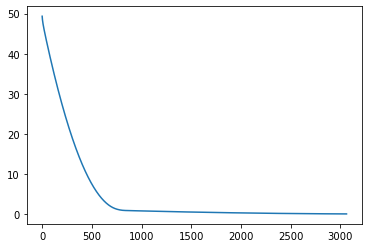

In [16]:
plt.plot(range(0,iterationsDone),Cost_List)

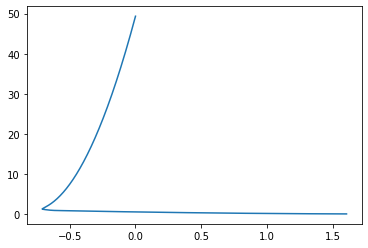

In [17]:
plt.plot(Theta0_List,Cost_List)

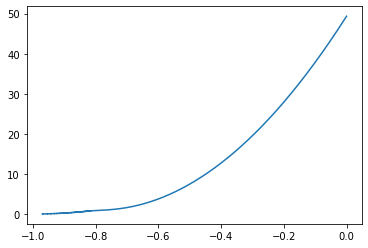

In [18]:
plt.plot(Theta1_List,Cost_List)
plt.show()

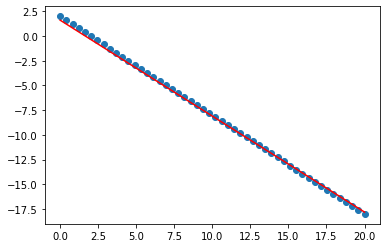

In [19]:
plt.scatter(x,y)
plt.plot(x,BestYPredicted,'r')

In [81]:
#***************************************************Adam**************************************************************************
#*********************************************************************************************************************************

In [20]:
#epsilon
eps=(math.e)**-8
#beta B1=BO and B2=BT
BO=0.9
BT=0.999

def Predict_y(theta0,theta1):
    return theta0+theta1*x


def CostFunc(predictedY):
    return 0.5 * (1/m) * (np.sum((predictedY- y)**2))

#return Grad_Theta0,Grad_Theta1
def GradientTheta(predictedY):
    grad_theta0=(1/m) * np.sum(predictedY - y)
    grad_theta1=(1/m) * np.sum((predictedY - y) * x)
    return grad_theta0, grad_theta1


    
def UpdateThetas(i,L_R,theta0,theta1,predictedY,Vt_theta0,Vt_theta1,mt_theta0,mt_theta1,iterations):
    Grad_Of_Theta0,Grad_Of_Theta1=GradientTheta(predictedY)
    Grad_Vec = np.array([Grad_Of_Theta0,Grad_Of_Theta0])
    
    #the vt+1 =vt_update and mt+1 = mt_update
    Vt_theta0= BT * Vt_theta0 + (1-BT) * Grad_Of_Theta0**2
    Vt_theta1= BT * Vt_theta1 + (1-BT) * Grad_Of_Theta1**2
    
    
    mt_theta0= BO * mt_theta0 + (1-BO) * Grad_Of_Theta0
    mt_theta1= BO * mt_theta1 + (1-BO) * Grad_Of_Theta1
    
    #Bias correction for each Vt_update and mt_update
    Vt_theta0_cor= Vt_theta0 / (1- (BT**i))
    Vt_theta1_cor= Vt_theta1 / (1- (BT**i))
    
    mt_theta0_cor= mt_theta0 / (1- (BO**i))
    mt_theta1_cor= mt_theta1 / (1- (BO**i))
    
    
    theta_0update= theta0 - ( (L_R * mt_theta0_cor) /  (math.sqrt(Vt_theta0_cor) + eps))
    theta_1update= theta1 - ( (L_R * mt_theta1_cor) / (math.sqrt(Vt_theta1_cor) + eps))
    return Grad_Vec, theta_0update, theta_1update,Vt_theta0,Vt_theta1,mt_theta0,mt_theta1



#Gradient_Descent
def FindBestThetas(x,y,N,Max_iterations):
    L_R=N
    
    
    theta0=0
    theta1=0
    theta0List=[]
    theta1List=[]
    
    predictedYList=[]
    CostFunList=[]
    iterations=0
    i=1
    Vt_theta0=0
    Vt_theta1=0
    mt_theta0=0
    mt_theta1=0
  
    while (iterations < Max_iterations) :
            
            if iterations > 1:
                if np.linalg.norm(grad_vec)< 10**-4:
                    print("Grad condition stopped the iterations")
                    break
                elif abs(CostFunList[iterations-1]- CostFunList[iterations-2])< 10**-6:
                    print("cost condition stoppped the iterations")
                    break
            
            
            theta0List.append(theta0)
            theta1List.append(theta1)
            
            predictedY= Predict_y(theta0,theta1)
            predictedYList.append(predictedY)
            
            Jcost1=CostFunc(predictedY)
            CostFunList.append(Jcost1)
            
            grad_vec,theta0,theta1,Vt_theta0,Vt_theta1,mt_theta0,mt_theta1= UpdateThetas(i,L_R,theta0,theta1,predictedY,Vt_theta0,Vt_theta1,mt_theta0,mt_theta1,iterations)
            
            i+=1
            iterations+=1

            
    return theta0List,theta1List,CostFunList,predictedYList,theta0,theta1,iterations
        



In [21]:
N=0.001
m=len(y)

Max_iterations=5000

Theta0_List,Theta1_List,Cost_List,predictedY_List,BestTheta0,BestTheta1,iterationsDone= FindBestThetas(x,y,N,Max_iterations)
BestYPredicted= Predict_y(BestTheta0,BestTheta1)

print("BestTheta0:",BestTheta0)
print("BestTheta1:",BestTheta1)

print(iterationsDone)

BestTheta0: 0.826242624191489
BestTheta1: -0.9110580052321694
5000


In [22]:
from sklearn.metrics import r2_score

r2_score(y,BestYPredicted)

0.989759003402749

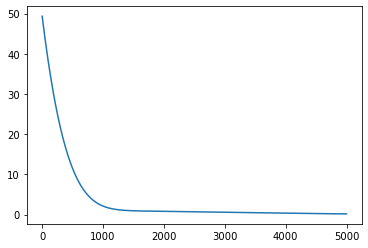

In [23]:
plt.plot(range(0,iterationsDone),Cost_List)

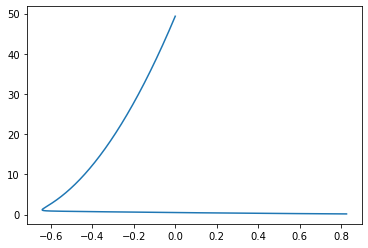

In [24]:
plt.plot(Theta0_List,Cost_List)

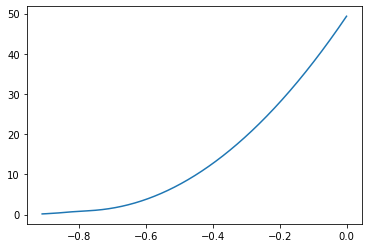

In [25]:
plt.plot(Theta1_List,Cost_List)
plt.show()

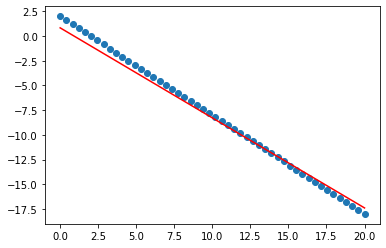

In [26]:
plt.scatter(x,y)
plt.plot(x,BestYPredicted,'r')